<a href="https://colab.research.google.com/github/CodeVins/Data-Analyze/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/CodeVins/seoul2013_violent_crime/main/seoul_2013_rainfall_violent_crime_merged.csv'
df = pd.read_csv(url, encoding='utf-8-sig')

df.head()

,month,월강수합계,월평균강수,비온날수,전체일수,비온날비율(%),서울 강력범죄 발생수
0,2013-01,22.1,0.712903,7,31,22.580645,396
1,2013-02,74.1,2.646429,8,28,28.571429,346
2,2013-03,27.3,0.880645,8,31,25.806452,444
3,2013-04,71.7,2.390000,15,30,50.000000,546
4,2013-05,132.0,4.258065,10,31,32.258065,558


In [ ]:
file_path = '/content/seoul_2013_rainfall_violent_crime_merged.csv'

df.to_csv(file_path, index=False, encoding='utf-8-sig')

print(f"파일이 저장되었습니다: {file_path}")

파일이 저장되었습니다: /content/seoul_2013_rainfall_violent_crime_merged.csv


In [ ]:
import pandas as pd

merged_df = pd.read_csv('/content/seoul_2013_rainfall_violent_crime_merged.csv', encoding='utf-8-sig')

merged_df['month'] = pd.to_datetime(merged_df['month']).dt.to_period('M')

print(merged_df.head())

     month  월강수합계     월평균강수  비온날수  전체일수   비온날비율(%)  서울 강력범죄 발생수
0  2013-01   22.1  0.712903     7    31  22.580645          396
1  2013-02   74.1  2.646429     8    28  28.571429          346
2  2013-03   27.3  0.880645     8    31  25.806452          444
3  2013-04   71.7  2.390000    15    30  50.000000          546
4  2013-05  132.0  4.258065    10    31  32.258065          558


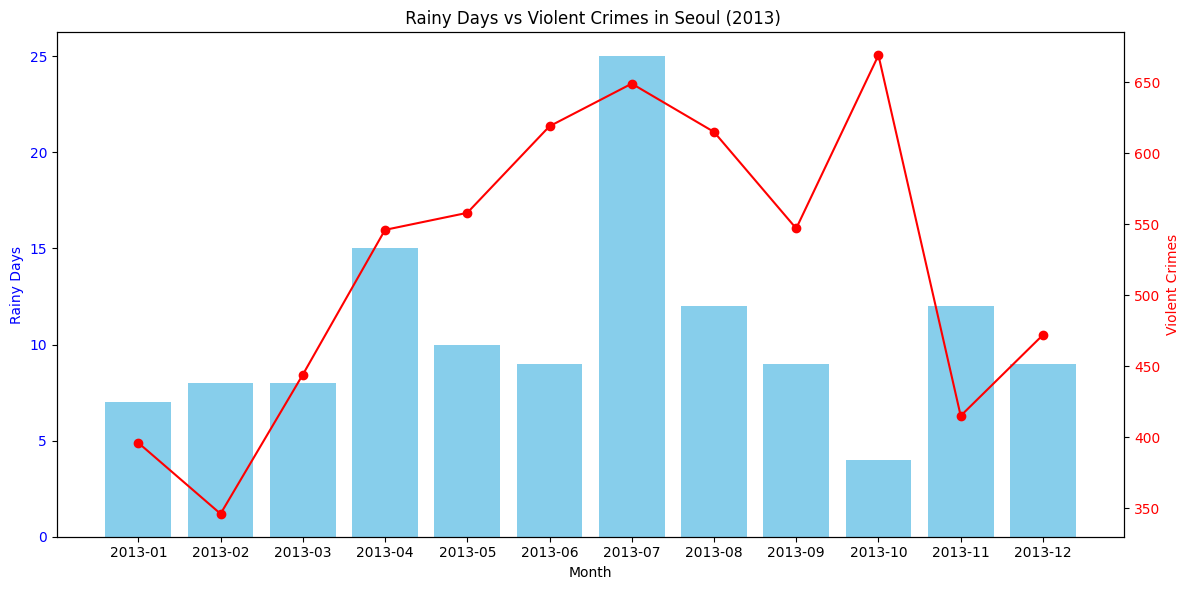

In [ ]:
import matplotlib.pyplot as plt

x = merged_df['month'].astype(str)
rain_days = merged_df['비온날수']
crime = merged_df['서울 강력범죄 발생수']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(x, rain_days, color='skyblue', label='Rainy Days')
ax1.set_ylabel('Rainy Days', color='blue')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(x, crime, color='red', marker='o', label='Violent Crimes')
ax2.set_ylabel('Violent Crimes', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(" Rainy Days vs Violent Crimes in Seoul (2013)")
fig.tight_layout()
plt.show()

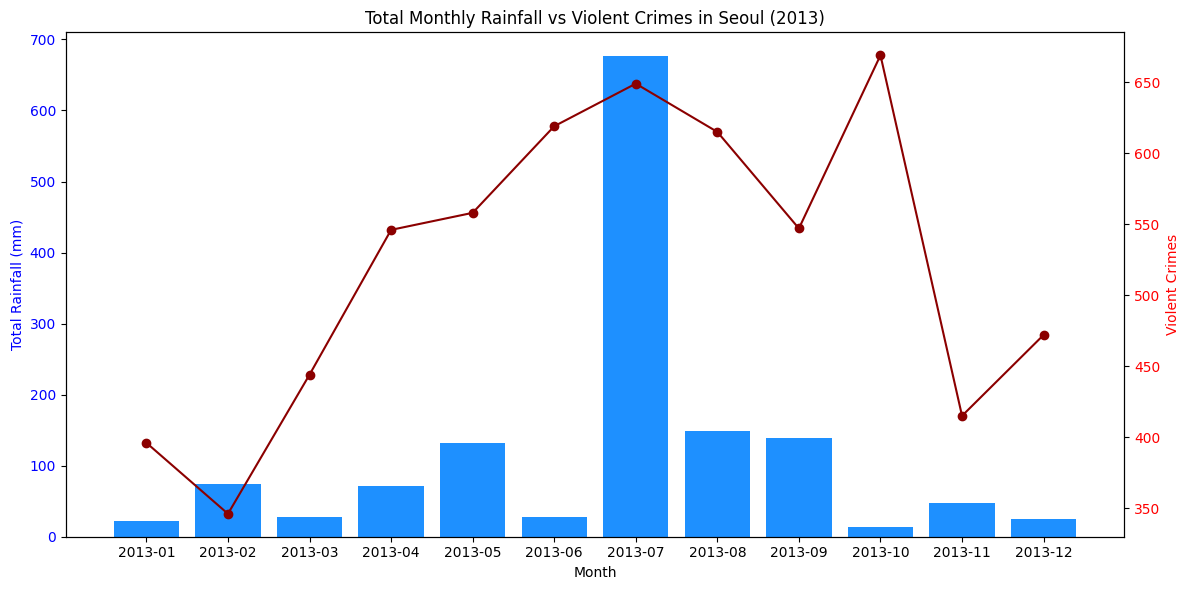

In [ ]:
x = merged_df['month'].astype(str)
rain_amount = merged_df['월강수합계']
crime = merged_df['서울 강력범죄 발생수']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(x, rain_amount, color='dodgerblue', label='Monthly Rainfall')
ax1.set_ylabel('Total Rainfall (mm)', color='blue')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(x, crime, color='darkred', marker='o', label='Violent Crimes')
ax2.set_ylabel('Violent Crimes', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total Monthly Rainfall vs Violent Crimes in Seoul (2013)')
fig.tight_layout()
plt.show()

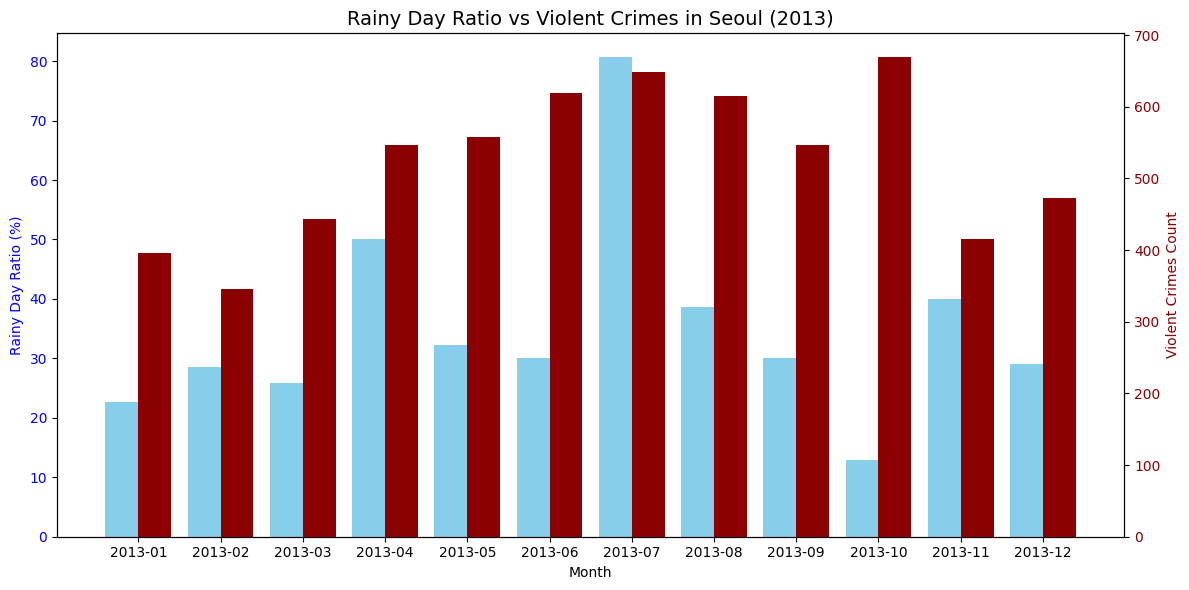

In [ ]:
import numpy as np

x = merged_df['month'].astype(str)
rain_ratio = merged_df['비온날비율(%)']
crime_count = merged_df['서울 강력범죄 발생수']

x_indexes = np.arange(len(x))
bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

bars1 = ax1.bar(x_indexes - bar_width/2, rain_ratio, width=bar_width, color='skyblue', label='Rainy Day Ratio (%)')
ax1.set_ylabel('Rainy Day Ratio (%)', color='blue')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
bars2 = ax2.bar(x_indexes + bar_width/2, crime_count, width=bar_width, color='darkred', label='Violent Crimes')
ax2.set_ylabel('Violent Crimes Count', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.xticks(ticks=x_indexes, labels=x, rotation=45)

plt.title('Rainy Day Ratio vs Violent Crimes in Seoul (2013)', fontsize=14)
fig.tight_layout()
plt.show()


눈 포함된 달 제외 후 상관계수 (Pearson r): 0.128


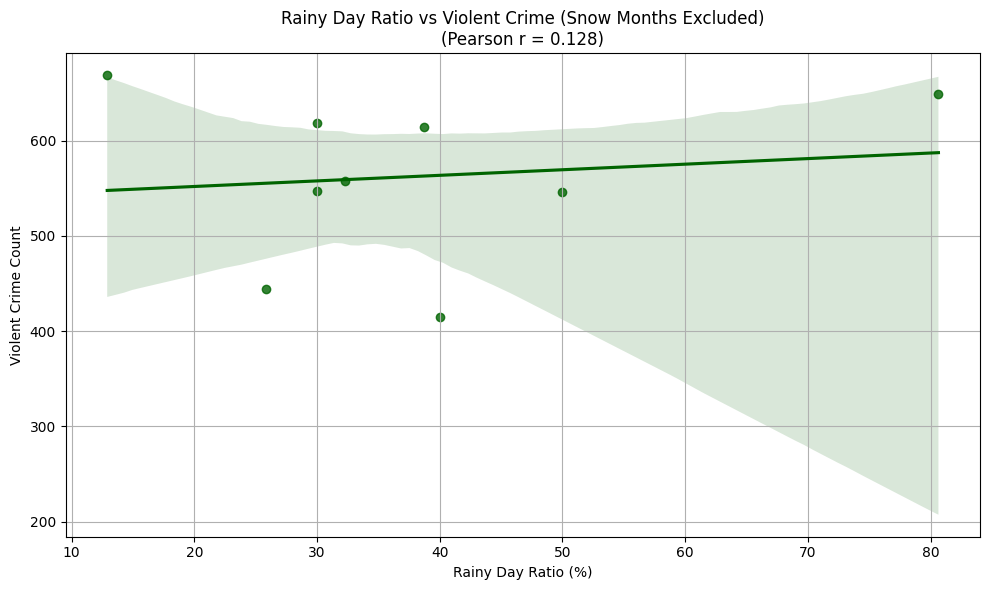

In [ ]:
import seaborn as sns
import scipy.stats as stats

filtered_df = merged_df[~merged_df['month'].astype(str).isin(['2013-01', '2013-02', '2013-12'])]

from scipy.stats import pearsonr

x = filtered_df['비온날비율(%)']
y = filtered_df['서울 강력범죄 발생수']
corr, p_value = pearsonr(x, y)

print(f'눈 포함된 달 제외 후 상관계수 (Pearson r): {corr:.3f}')

plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_df, x='비온날비율(%)', y='서울 강력범죄 발생수', color='darkgreen')

plt.title(f'Rainy Day Ratio vs Violent Crime (Snow Months Excluded)\n(Pearson r = {corr:.3f})')
plt.xlabel('Rainy Day Ratio (%)')
plt.ylabel('Violent Crime Count')
plt.grid(True)
plt.tight_layout()
plt.show()
